# Final Task Kalbe Nutritionals

## Data Understanding

### Import & Merge Data

In [1]:
import pandas as pd
import numpy as np 
pd.options.display.max_columns = None

df_customer = pd.read_csv('D:\GitHub\Final-Task-Kalbe\Dataset\Customer.csv', sep=';')
df_product = pd.read_csv('D:\GitHub\Final-Task-Kalbe\Dataset\Product.csv', sep=';')
df_store = pd.read_csv('D:\GitHub\Final-Task-Kalbe\Dataset\Store.csv', sep=';')
df_transaction = pd.read_csv('D:\GitHub\Final-Task-Kalbe\Dataset\Transaction.csv', sep=';')

In [2]:
# Melakukan operasi join antara tabel-tabel
df = pd.merge(df_transaction, df_product, on='ProductID')
df = pd.merge(df, df_store, on='StoreID')
df = pd.merge(df, df_customer, on='CustomerID')

## Exploratory Data Analysis (EDA)

In [3]:
df.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",36,0,Married,"10,53"
1,TR56601,328,24/12/2022,P9,10000,1,10000,9,Yoghurt,10000,Lingga,Lingga,Modern Trade,"-3,654703","128,190643",36,0,Married,"10,53"
2,TR89012,328,25/03/2022,P5,4200,5,21000,6,Thai Tea,4200,Lingga,Lingga,Modern Trade,"-5,135399","119,42379",36,0,Married,"10,53"
3,TR67395,328,22/01/2022,P8,16000,3,48000,11,Oat,16000,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403",36,0,Married,"10,53"
4,TR45738,328,29/12/2022,P2,3200,3,9600,11,Ginger Candy,3200,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403",36,0,Married,"10,53"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TransactionID   5020 non-null   object
 1   CustomerID      5020 non-null   int64 
 2   Date            5020 non-null   object
 3   ProductID       5020 non-null   object
 4   Price_x         5020 non-null   int64 
 5   Qty             5020 non-null   int64 
 6   TotalAmount     5020 non-null   int64 
 7   StoreID         5020 non-null   int64 
 8   Product Name    5020 non-null   object
 9   Price_y         5020 non-null   int64 
 10  StoreName       5020 non-null   object
 11  GroupStore      5020 non-null   object
 12  Type            5020 non-null   object
 13  Latitude        5020 non-null   object
 14  Longitude       5020 non-null   object
 15  Age             5020 non-null   int64 
 16  Gender          5020 non-null   int64 
 17  Marital Status  4976 non-null   object
 18  Income  

In [5]:
# df[df['Price_x'].values == df['Price_y'].values]
df.drop(columns=['Price_y'], inplace=True)
df.rename(columns={'Price_x' : 'Price'}, inplace=True)

In [6]:
df[df.duplicated()]

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income


In [7]:
for i in df.columns :
    print(f"~ ~ ~ {i} || Type : {df[i].dtypes} ~ ~ ~")
    print(f"{df[i].unique().tolist()[:5]} \n")

~ ~ ~ TransactionID || Type : object ~ ~ ~
['TR11369', 'TR56601', 'TR89012', 'TR67395', 'TR45738'] 

~ ~ ~ CustomerID || Type : int64 ~ ~ ~
[328, 117, 335, 181, 154] 

~ ~ ~ Date || Type : object ~ ~ ~
['01/01/2022', '24/12/2022', '25/03/2022', '22/01/2022', '29/12/2022'] 

~ ~ ~ ProductID || Type : object ~ ~ ~
['P3', 'P9', 'P5', 'P8', 'P2'] 

~ ~ ~ Price || Type : int64 ~ ~ ~
[7500, 10000, 4200, 16000, 3200] 

~ ~ ~ Qty || Type : int64 ~ ~ ~
[4, 1, 5, 3, 6] 

~ ~ ~ TotalAmount || Type : int64 ~ ~ ~
[30000, 10000, 21000, 48000, 9600] 

~ ~ ~ StoreID || Type : int64 ~ ~ ~
[12, 9, 6, 11, 5] 

~ ~ ~ Product Name || Type : object ~ ~ ~
['Crackers', 'Yoghurt', 'Thai Tea', 'Oat', 'Ginger Candy '] 

~ ~ ~ StoreName || Type : object ~ ~ ~
['Prestasi Utama', 'Lingga', 'Sinar Harapan', 'Bonafid', 'Prima Tendean'] 

~ ~ ~ GroupStore || Type : object ~ ~ ~
['Prestasi', 'Lingga', 'Gita', 'Prima', 'Buana'] 

~ ~ ~ Type || Type : object ~ ~ ~
['General Trade', 'Modern Trade'] 

~ ~ ~ Latitude || Typ

In [8]:
df.isnull().sum()

TransactionID      0
CustomerID         0
Date               0
ProductID          0
Price              0
Qty                0
TotalAmount        0
StoreID            0
Product Name       0
StoreName          0
GroupStore         0
Type               0
Latitude           0
Longitude          0
Age                0
Gender             0
Marital Status    44
Income             0
dtype: int64

In [9]:
df['Latitude'] = df['Latitude'].str.replace(',', '.')
df['Latitude'] = df['Latitude'].astype(float)

df['Longitude'] = df['Longitude'].str.replace(',', '.')
df['Longitude'] = df['Longitude'].astype(float)

df['Income'] = df['Income'].str.replace(',', '.')
df['Income'] = df['Income'].astype(float)

In [10]:
df.describe()

,CustomerID,Price,Qty,TotalAmount,StoreID,Latitude,Longitude,Age,Gender,Income
count,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000
mean,221.263745,9684.800797,3.644622,32279.482072,7.489841,-2.942236,109.600789,40.003586,0.452988,8.623713
std,129.672955,4600.708780,1.855295,19675.462455,4.028502,4.323225,8.357593,12.834719,0.497835,6.518242
min,1.000000,3200.000000,1.000000,7500.000000,1.000000,-7.797068,95.323753,0.000000,0.000000,0.000000
25%,108.000000,4200.000000,2.000000,16000.000000,4.000000,-6.914864,104.756554,30.000000,0.000000,4.220000
50%,221.000000,9400.000000,3.000000,28200.000000,7.000000,-5.135399,110.370529,39.000000,0.000000,7.720000
75%,332.000000,15000.000000,5.000000,47000.000000,11.000000,0.533505,114.590111,51.000000,1.000000,10.780000
max,447.000000,18000.000000,10.000000,88000.000000,14.000000,5.548290,128.190643,72.000000,1.000000,71.300000


In [11]:
df.nunique()

TransactionID     4908
CustomerID         447
Date               365
ProductID           10
Price               10
Qty                 10
TotalAmount         44
StoreID             14
Product Name        10
StoreName           12
GroupStore           7
Type                 2
Latitude            14
Longitude           14
Age                 54
Gender               2
Marital Status       2
Income             369
dtype: int64

In [12]:
df_status_nan = df[~df['Marital Status'].isin(['Married', 'Single'])]
df_status_nan.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income
1002,TR65931,443,19/05/2022,P1,8800,5,44000,12,Choco Bar,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,33,1,NaN,9.28
1003,TR81388,443,30/10/2022,P5,4200,4,16800,10,Thai Tea,Harapan Baru,Harapan Baru,General Trade,3.597031,98.678513,33,1,NaN,9.28
1004,TR66239,443,15/02/2022,P5,4200,5,21000,14,Thai Tea,Priangan,Priangan,Modern Trade,-5.450000,105.266670,33,1,NaN,9.28
1005,TR65307,443,15/01/2022,P5,4200,4,16800,4,Thai Tea,Gita Ginara,Gita,General Trade,-6.966667,110.416664,33,1,NaN,9.28
1006,TR13981,443,06/11/2022,P5,4200,2,8400,4,Thai Tea,Gita Ginara,Gita,General Trade,-6.966667,110.416664,33,1,NaN,9.28


In [13]:
print(f"Jumlah Missing Values pada kolom 'Marital Status' : {df_status_nan.shape[0]}")

Jumlah Missing Values pada kolom 'Marital Status' : 44


### Distribusi Data

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk plotting boxplot
def plot_box(data, labels, title, figsize=(15, 6)):
    sns.set_style("whitegrid")
    plt.figure(figsize=figsize) 
    ax = sns.boxplot(data=data, orient='h', showmeans=True)
    ax.set_xlabel('Value')
    ax.set_title(title)
    ax.set_yticklabels(labels)

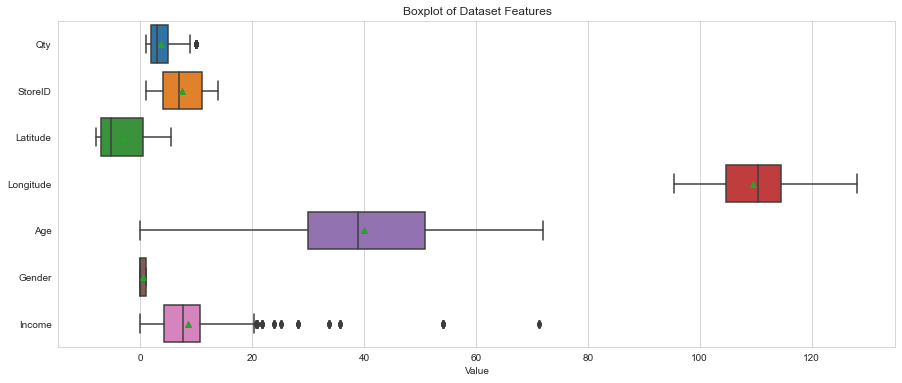

In [15]:
df_col_num = df[['Qty', 'StoreID', 'Latitude', 'Longitude', 'Age', 'Gender', 'Income']]
plot_box(data = df_col_num,
         labels = df_col_num.columns.tolist(),
         title='Boxplot of Dataset Features')

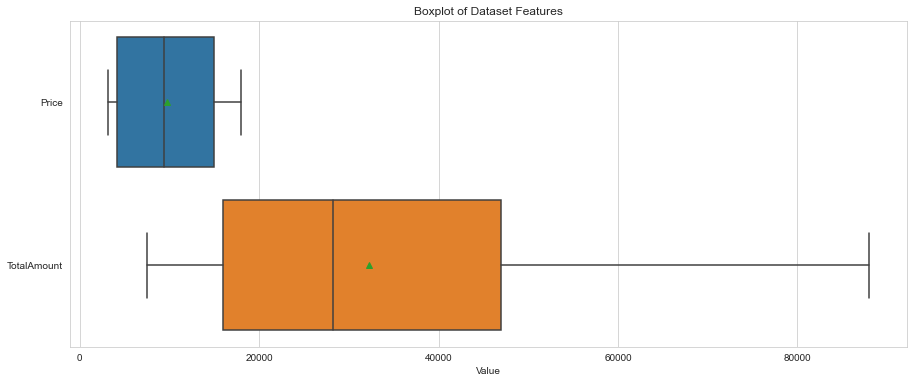

In [16]:
df_col_num = df[['Price', 'TotalAmount']]
plot_box(data = df_col_num,
         labels = df_col_num.columns.tolist(),
         title='Boxplot of Dataset Features')

In [17]:
import matplotlib.pyplot as plt

def plot_string_columns(dataframe, column_names):
    num_cols = len(column_names)
    fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(14, 8))

    for i, col in enumerate(column_names):
        value_counts = dataframe[col].value_counts()
        labels = value_counts.index
        counts = value_counts.values

        # Menggunakan warna langsung pada fungsi color
        bars = axes[i].bar(labels, counts, color='steelblue')

        axes[i].set_title(f"Distribusi Data pada Kolom {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Counts")

        for bar in bars:
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width() / 2, height, height,
                         ha='center', va='bottom')

        axes[i].tick_params(axis='both', which='major', labelsize=12)
        axes[i].tick_params(axis='x', labelsize=12)
        axes[i].tick_params(axis='y', labelsize=12)

    plt.tight_layout()
    plt.show()


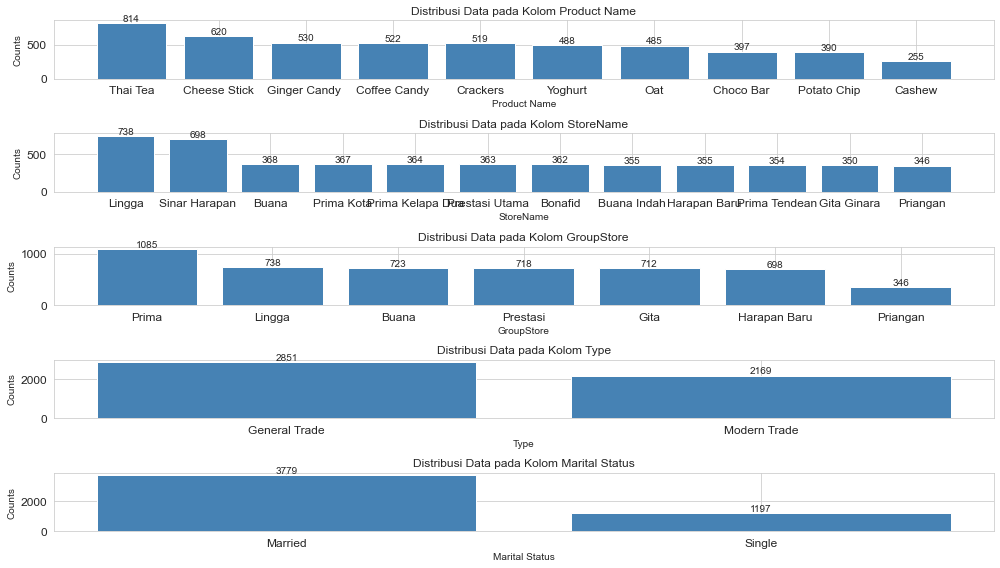

In [18]:
col = ['Product Name', 'StoreName', 'GroupStore', 'Type', 'Marital Status']
plot_string_columns(df, col)

### Heatmap Features Correlation

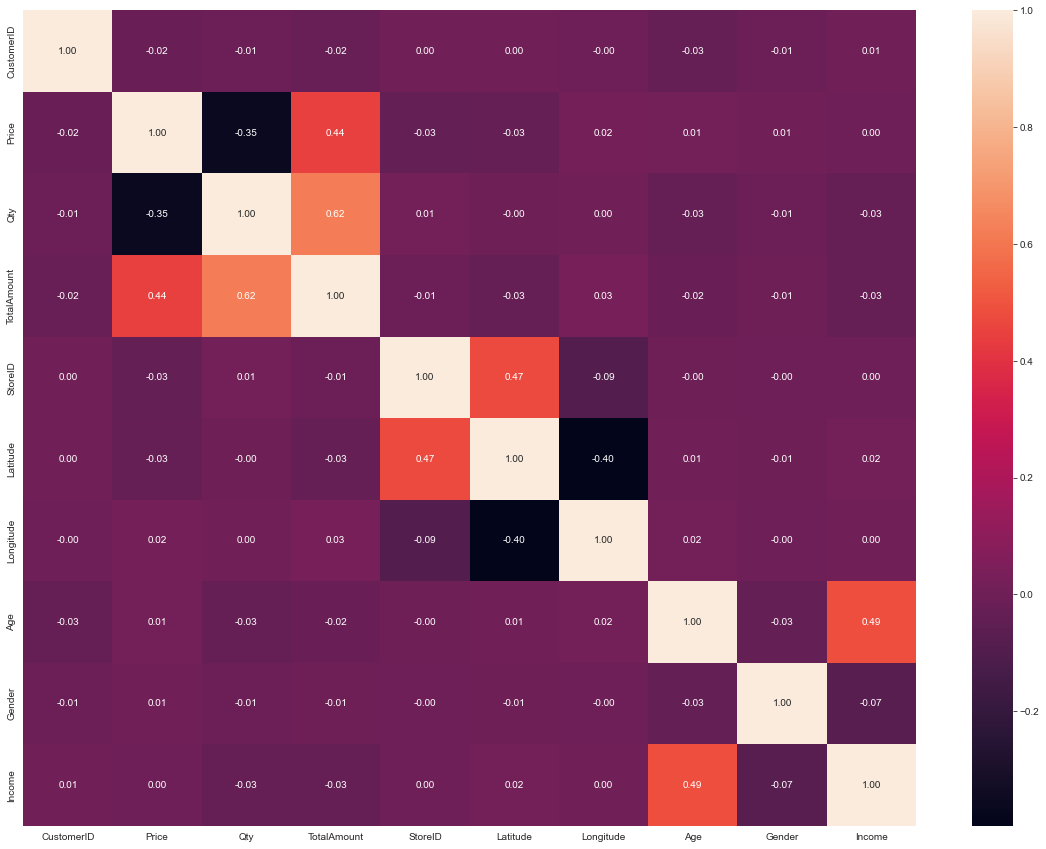

In [19]:
# heatmap correlation
corr = df.corr()

plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

### Checking Multikolinearitas

In [20]:
# MULTIKOLINEARITAS

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant

# Tambahkan sebuah konstanta pada dataframe (prasyarat perhitungan)
selected_columns = ['Price', 'Qty', 'TotalAmount', 'StoreID', 'Latitude', 'Longitude', 'Age', 'Gender', 'Income']
df_selected = df[selected_columns]

X = add_constant(df_selected)

# VIF dataframe
vif_data = pd.DataFrame()

# Hitung VIF tiap fitur
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data = vif_data[vif_data['feature'] != 'const']

display(vif_data)

,feature,VIF
1,Price,6.063522
2,Qty,7.951643
3,TotalAmount,8.637968
4,StoreID,1.304339
5,Latitude,1.533164
6,Longitude,1.202565
7,Age,1.311551
8,Gender,1.005883
9,Income,1.316511


## Time Series ARIMA

### Ekstraksi Data

In [21]:
import warnings
pd.options.display.max_columns = None
warnings.filterwarnings("ignore")

df.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,36,0,Married,10.53
1,TR56601,328,24/12/2022,P9,10000,1,10000,9,Yoghurt,Lingga,Lingga,Modern Trade,-3.654703,128.190643,36,0,Married,10.53
2,TR89012,328,25/03/2022,P5,4200,5,21000,6,Thai Tea,Lingga,Lingga,Modern Trade,-5.135399,119.423790,36,0,Married,10.53
3,TR67395,328,22/01/2022,P8,16000,3,48000,11,Oat,Sinar Harapan,Prestasi,General Trade,0.533505,101.447403,36,0,Married,10.53
4,TR45738,328,29/12/2022,P2,3200,3,9600,11,Ginger Candy,Sinar Harapan,Prestasi,General Trade,0.533505,101.447403,36,0,Married,10.53


In [22]:
df['Date'] = pd.to_datetime(df['Date'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   5020 non-null   object        
 1   CustomerID      5020 non-null   int64         
 2   Date            5020 non-null   datetime64[ns]
 3   ProductID       5020 non-null   object        
 4   Price           5020 non-null   int64         
 5   Qty             5020 non-null   int64         
 6   TotalAmount     5020 non-null   int64         
 7   StoreID         5020 non-null   int64         
 8   Product Name    5020 non-null   object        
 9   StoreName       5020 non-null   object        
 10  GroupStore      5020 non-null   object        
 11  Type            5020 non-null   object        
 12  Latitude        5020 non-null   float64       
 13  Longitude       5020 non-null   float64       
 14  Age             5020 non-null   int64         
 15  Gend

In [24]:
df_grouped = df.groupby('Date')['Qty'].sum().reset_index().set_index('Date')
df_grouped.head()

,Qty
Date,
2022-01-01,49
2022-01-02,50
2022-01-03,76
2022-01-04,98
2022-01-05,67


### Dekomposisi

Proses mendekontruksi (penataan ulang) atau memecah deret waktu menjadi komponen – komponen atau beberapa pola berikut 

<ol>
<li>Trend : Pergerakan data dari waktu ke waktu</li>
<li>Seasonal : Perilaku runtut waktu yang ditangkap dalam periode musim tertentu</li>
<li>Residual : Sesuatu yang selain trend dan seasonal</li>
</ol>

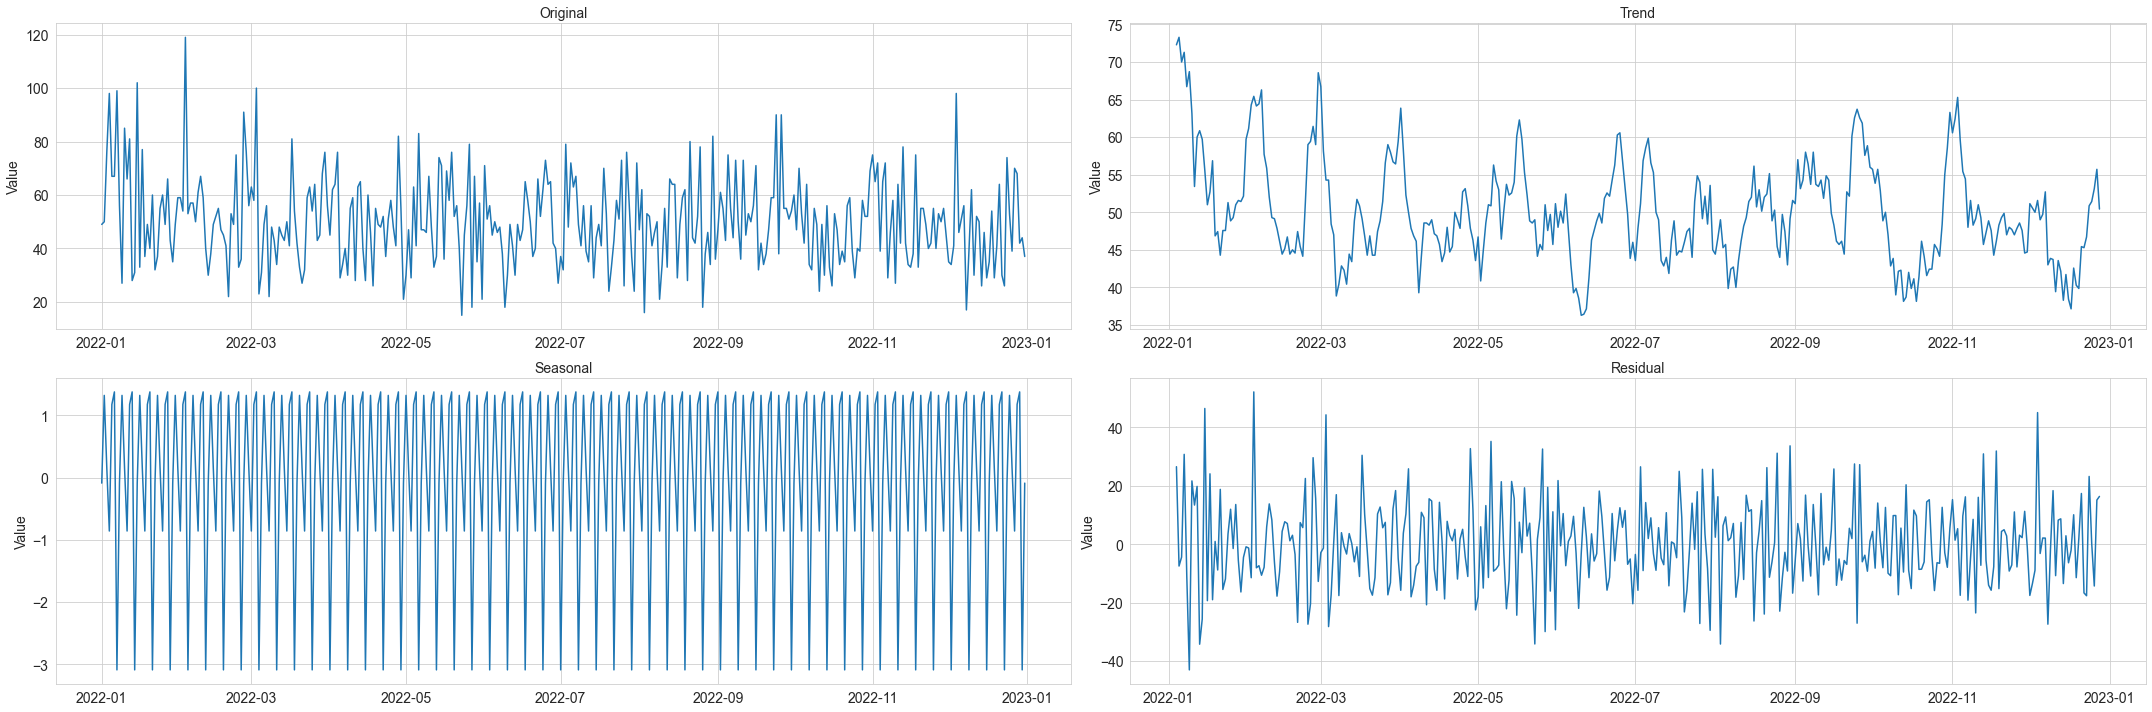

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_grouped, model='additive')
fig, axes = plt.subplots(2, 2, figsize=(30, 10))  

axes[0, 0].set_title('Original', fontsize=14)  
axes[0, 0].plot(result.observed)
axes[0, 0].tick_params(axis='both', which='major', labelsize=14)
axes[0, 0].set_xlabel('', fontsize=14)  
axes[0, 0].set_ylabel('Value', fontsize=14) 

axes[0, 1].set_title('Trend', fontsize=14)
axes[0, 1].plot(result.trend)
axes[0, 1].tick_params(axis='both', which='major', labelsize=14)
axes[0, 1].set_xlabel('', fontsize=14)  
axes[0, 1].set_ylabel('Value', fontsize=14) 

axes[1, 0].set_title('Seasonal', fontsize=14)
axes[1, 0].plot(result.seasonal)
axes[1, 0].tick_params(axis='both', which='major', labelsize=14)
axes[1, 0].set_xlabel('', fontsize=14)  
axes[1, 0].set_ylabel('Value', fontsize=14) 

axes[1, 1].set_title('Residual', fontsize=14)
axes[1, 1].plot(result.resid)
axes[1, 1].tick_params(axis='both', which='major', labelsize=14)
axes[1, 1].set_xlabel('', fontsize=14)  
axes[1, 1].set_ylabel('Value', fontsize=14) 

# Tampilkan plot
plt.tight_layout()
plt.show()


### Uji Stasioner
Kestasioneran data merupakan kondisi yang diperlukan dalam analisis regresi deret waktu karena dapat memperkecil kekeliruan model

Untuk data yang tidak stasioner, perlu dilakukan proses transformasi stasioneritas. Untuk metode yang dilakukan perlu diperiksa terlebih dahulu trend pada time series

Uji stasioner pada data time series dapat dilakukan dengan dua cara yakni dengan memplot grafik atau melakukan uji statistic. Uji statistic kestasioneran data bisa dilakukan dengan salah satu metode berikut :

<ol>
<li>Augmented Dickey – Fuller Test</li>
<li>Kwiatkowski - Phillips - Schmidt - Shin (KPSS) Test</li>
</ol>

#### Augmented Dickey – Fuller Test (ADF)
Uji <i>Augmented Dickey-Fuller</i> adalah jenis uji statistik yang disebut *unit root test* (uji akar unit).

Dalam teori dan statistik probabilitas, akar unit adalah fitur dari beberapa proses stokastik (seperti jalan acak) yang dapat menyebabkan masalah dalam inferensi statistik yang melibatkan model deret waktu. Secara sederhana, akar unit tidak stasioner tetapi tidak selalu memiliki komponen tren. Asumsi tes ini :

**Hipotesa Null (H0)** : Data terindikasi non-stasioner atau memiliki *unit root*.

**Hipotesa Alternatif (H1)** :  Data terindikasi stasioner atau tidak memiliki *unit root*.

In [26]:
from statsmodels.tsa import stattools

def uji_adfuller(Series):    
    # Proses pengujian ADF
    adfuller_test = stattools.adfuller(
        Series, 
        autolag='AIC'
    )[ : 4]

    # Pengambilan Kesimpulan berdasarkan p-value
    if(adfuller_test[1] < 0.05):
        adfuller_test += ('H0 ditolak', 'Data terindikasi Stasioner')
    else:
        adfuller_test += ('H0 diterima', 'Data terindikasi Non-Stasioner')

    # Jadikan dataframe
    output_adfuller = pd.DataFrame({ 
        'Keterangan' : ['Uji Statistik', 'p-value', 'Lags digunakan', 'Banyak Observasi', 'Hasil Uji', 'Kesimpulan'],
        'Nilai uji' : adfuller_test
    })

    return(output_adfuller)

In [27]:
adf_result = uji_adfuller(df_grouped['Qty'])
adf_result

,Keterangan,Nilai uji
0,Uji Statistik,-19.018783
1,p-value,0.0
2,Lags digunakan,0
3,Banyak Observasi,364
4,Hasil Uji,H0 ditolak
5,Kesimpulan,Data terindikasi Stasioner


#### Kwiatkowski - Phillips - Schmidt - Shin
Uji KPSS, kependekan dari, Kwiatkowski - Phillips - Schmidt - Shin (KPSS), adalah jenis uji akar Unit yang menguji stasioneritas rangkaian tertentu pada tren deterministik.

**Hipotesa Null (H0)** : Trend data terindikasi stasioner.

**Hipotesa Alternatif (H1)** :  Data terindikasi non-stasioner atau memiliki *unit root*.

In [28]:
from statsmodels.tsa import stattools

def uji_kpss(Series):

    # Proses pengujian kpss
    kpss_test = stattools.kpss(
        Series, 
        regression = 'c',
        nlags = 'auto'
    )[ : 3]

    # Pengambilan Kesimpulan berdasarkan p-value
    if(kpss_test[1] < 0.05):
        kpss_test += ('H0 ditolak', 'Data terindikasi Non-Stasioner')
    else:
        kpss_test += ('H0 diterima', 'Data terindikasi Stasioner')

    # Jadikan dataframe
    output_kpss = pd.DataFrame({ 
        'Keterangan' : ['Uji Statistik', 'p-value', 'Lags digunakan', 'Hasil Uji', 'Kesimpulan'],
        'Nilai uji' : kpss_test
    })

    return(output_kpss)

In [29]:
kpss_result = uji_kpss(df_grouped['Qty'])
kpss_result

,Keterangan,Nilai uji
0,Uji Statistik,0.425352
1,p-value,0.066227
2,Lags digunakan,5
3,Hasil Uji,H0 diterima
4,Kesimpulan,Data terindikasi Stasioner


<b>Kesimpulan</b> : Data bersifat stasioner.

#### Kesimpulan 2 Uji ADF - KPSS

<table>
  <tr>
    <td align="center">Hasil Uji ADF</td>
    <td align="center">Hasil Uji KPSS</td>
    <td align="center">Kesimpulan</td>
    <td align="center">Keterangan</td>
  </tr>
  <tr>
    <td align="center">Stasioner</td>
    <td align="center">Stasioner</td>
    <td align="center">Stasioner</td>
    <td align="left">Data disimpulkan Stasioner</td>
  </tr>
    <tr>
    <td align="center">Non - Stasioner</td>
    <td align="center">Non - Stasioner</td>
    <td align="center">Non - Stasioner</td>
    <td align="left">Data disimpulkan Non-Stasioner</td>
  </tr>
    <tr>
    <td align="center">Non - Stasioner</td>
    <td align="center">Stasioner</td>
    <td align="center">Trend Stasioner</td>
    <td align="left">Untuk membuat deret benar-benar stasioner, tren perlu dihilangkan dalam kasus ini.<br>Kemudian data yang telah <i>detrended</i> diperiksa stasioneritasnya</td>
  </tr>
    <tr>
    <td align="center">Stasioner</td>
    <td align="center">Non - Stasioner</td>
    <td align="center">Difference Stasioner</td>
    <td align="left">Perlu dilakukan proses <i>differencing</i> pada data,<br> lalu periksa kembali stasioneritasnya</>
  </tr>
</table>

<b>Trend stationary</b>: Tren rata-rata bersifat deterministik. Setelah tren diestimasi dan dihapus dari data, rangkaian residual merupakan proses stokastik stasioner

<b>Difference stationary</b>: Tren rata-rata adalah stokastik

**Proses deterministik** adalah suatu proses kejadian yang sudah pasti. 

**Proses stokastik** adalah proses kejadian yang belum pasti.

docs : <i>https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html</i>

## Data Splitting & Menentukan p,d,q

In [134]:
from sklearn.model_selection import train_test_split

# Splitting data tanpa pengambilan secara random
train, test = train_test_split(df_grouped['Qty'], test_size = 0.3, shuffle = False)

train = train.to_frame()
test = test.to_frame()

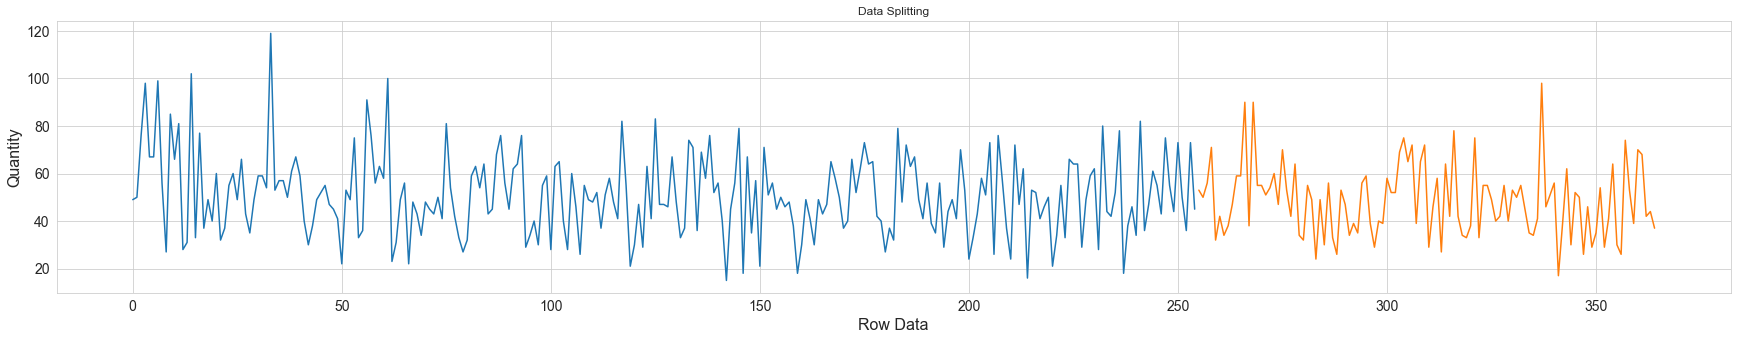

In [133]:
train_len = train.shape[0]
data_len = df_grouped.shape[0]

x_train = np.array(range(0, train_len))
x_test = np.array(range(train_len, data_len))

plt.figure(figsize=(30,5))
sns.lineplot(x=x_train, y=train['Qty']).set(title='Data Splitting')
sns.lineplot(x=x_test, y=test['Qty'])

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('Row Data', fontsize=16)
plt.ylabel('Quantity', fontsize=16)

plt.show()

### Menentukan Ordo (p)
=> Nilai p ditentukan dengan memplot PACF sebagai panduan penentuannya. 

Jika nilai PACF melebihi ambang batas bluish area maka lags atau index yang melebihi bluish area akan menjadi nilai p.


#### Plot PACF (Partial Autocorrelation Function)

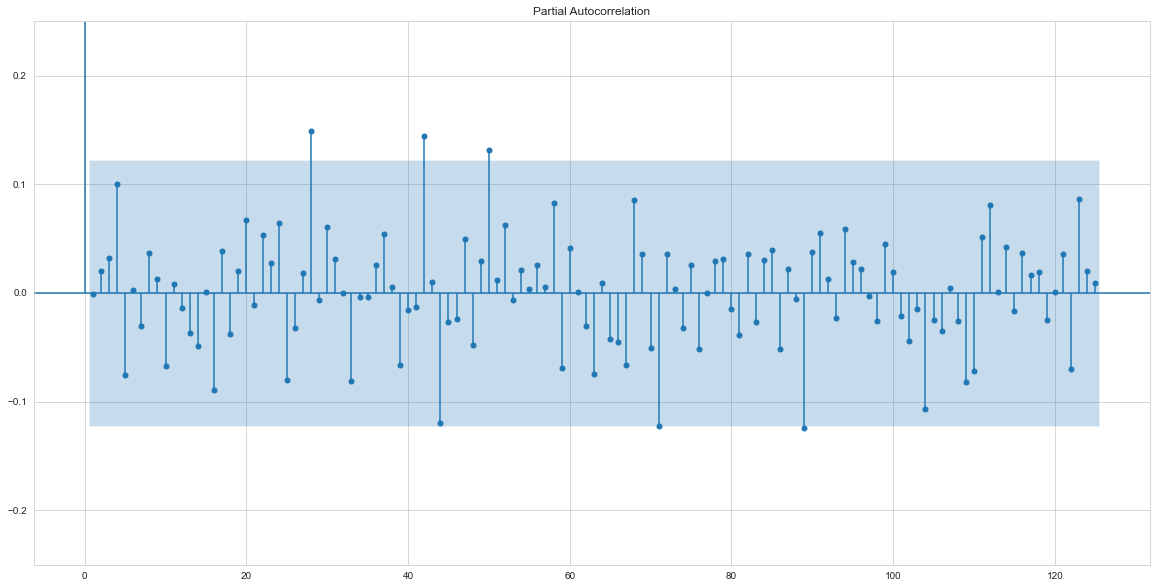

In [32]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(20, 10))  # Ukuran gambar yang diperbesar (lebar x tinggi)

plot_pacf(
    train['Qty'].dropna(),
    lags=int(train_len/2-2),
    ax=ax
)
ax.set_ylim(-0.25, 0.25)

plt.show()

<ol>Pada grafik terlihat bahwa pada PACF signifikan pada lags = 28 (nilai yang melebihi <b>bluish area</b> (area berwarna biru)).

 Maka akan digunakan AR(2) sebagai model ARIMA pada percobaan ini</ol>

### Menentukan Ordo Differencing (d)

In [33]:
from statsmodels.tsa.statespace.tools import diff

df_grouped['differencing_1'] = diff(df_grouped['Qty'], k_diff = 1)
df_grouped['differencing_2'] = diff(df_grouped['Qty'], k_diff = 2)
df_grouped

,Qty,differencing_1,differencing_2
Date,,,
2022-01-01,49,NaN,NaN
2022-01-02,50,1.0,NaN
2022-01-03,76,26.0,25.0
2022-01-04,98,22.0,-4.0
2022-01-05,67,-31.0,-53.0
...,...,...,...
2022-12-27,70,31.0,45.0
2022-12-28,68,-2.0,-33.0
2022-12-29,42,-26.0,-24.0


#### Plot Autocorrelation Function (ACF)

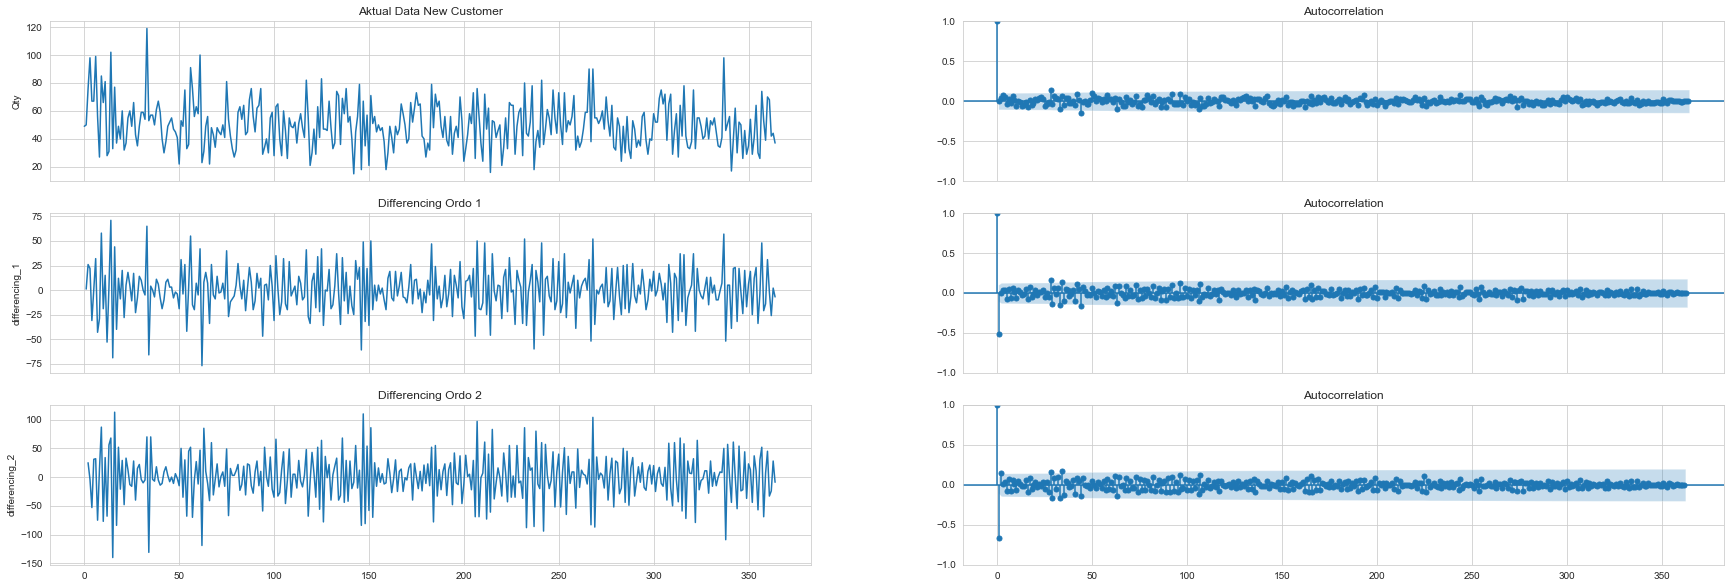

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Mengatur ukuran grafik
figs, axes = plt.subplots(
    3, 2,
    figsize = (30, 10),
    sharex = True
)

# Buat plot data aktual
line1 = sns.lineplot( 
    x = range(df_grouped.shape[0]),
    y = "Qty", 
    data = df_grouped,
    ax = axes[0, 0]
).set(title='Aktual Data New Customer')

# Plot autocorelation 
plot_acf(
    df_grouped['Qty'],  
    lags = df_grouped.shape[0]-1, 
    ax = axes[0, 1]
)

# Buat plot data differencing ordo 1
line2 = sns.lineplot( 
    x = range(df_grouped.shape[0]),
    y = "differencing_1", 
    data = df_grouped,
    ax = axes[1, 0]
).set(title='Differencing Ordo 1')

# Plot autocorelation differencing ordo 1
plot_acf(
    df_grouped['differencing_1'].dropna(),  
    lags = df_grouped.shape[0]-2, 
    ax = axes[1, 1]
)

# Buat plot differencing ordo 2
line3 = sns.lineplot( 
    x = range(df_grouped.shape[0]),
    y = "differencing_2", 
    data = df_grouped,
    ax = axes[2, 0]
).set(title='Differencing Ordo 2')

# Plot autocorelation differencing ordo 2
plot_acf(
    df_grouped['differencing_2'].dropna(),  
    lags = df_grouped.shape[0]-3, 
    ax = axes[2, 1]
)

plt.show()

### Uji Stasioner (ADF - KPSS)

In [35]:
# Import library yang dibutuhkan
from statsmodels.tsa import stattools

def uji_adfuller(Series):
    
    # Proses pengujian ADF
    adfuller_test = stattools.adfuller(
        Series, 
        autolag='AIC'
    )[ : 4]

    # Pengambilan Kesimpulan berdasarkan p-value
    if(adfuller_test[1] < 0.05):
        adfuller_test += ('H0 ditolak', 'Data terindikasi Stasioner')
    else:
        adfuller_test += ('H0 diterima', 'Data terindikasi Non-Stasioner')

    # Jadikan dataframe
    output_adfuller = pd.DataFrame({ 
        'Keterangan' : ['Uji Statistik', 'p-value', 'Lags digunakan', 'Banyak Observasi', 'Hasil Uji', 'Kesimpulan'],
        'Nilai uji' : adfuller_test
    })

    return(output_adfuller)

def uji_kpss(Series):

    # Proses pengujian kpss
    kpss_test = stattools.kpss(
        Series, 
        regression = 'c',
        nlags = 'auto'
    )[ : 3]

    # Pengambilan Kesimpulan berdasarkan p-value
    if(kpss_test[1] < 0.05):
        kpss_test += ('H0 ditolak', 'Data terindikasi Non-Stasioner')
    else:
        kpss_test += ('H0 diterima', 'Data terindikasi Stasioner')

    # Jadikan dataframe
    output_kpss = pd.DataFrame({ 
        'Keterangan' : ['Uji Statistik', 'p-value', 'Lags digunakan', 'Hasil Uji', 'Kesimpulan'],
        'Nilai uji' : kpss_test
    })

    return(output_kpss)

In [155]:
adf_result = uji_adfuller(df_grouped['Qty'].dropna())
adf_result

,Keterangan,Nilai uji
0,Uji Statistik,-19.018783
1,p-value,0.0
2,Lags digunakan,0
3,Banyak Observasi,364
4,Hasil Uji,H0 ditolak
5,Kesimpulan,Data terindikasi Stasioner


In [156]:
kpss_result = uji_kpss(df_grouped['Qty'].dropna())
kpss_result

,Keterangan,Nilai uji
0,Uji Statistik,0.425352
1,p-value,0.066227
2,Lags digunakan,5
3,Hasil Uji,H0 diterima
4,Kesimpulan,Data terindikasi Stasioner


In [36]:
adf_result = uji_adfuller(df_grouped['differencing_1'].dropna())
adf_result

,Keterangan,Nilai uji
0,Uji Statistik,-11.441931
1,p-value,0.0
2,Lags digunakan,7
3,Banyak Observasi,356
4,Hasil Uji,H0 ditolak
5,Kesimpulan,Data terindikasi Stasioner


In [37]:
adf_result = uji_adfuller(df_grouped['differencing_2'].dropna())
adf_result

,Keterangan,Nilai uji
0,Uji Statistik,-9.247165
1,p-value,0.0
2,Lags digunakan,16
3,Banyak Observasi,346
4,Hasil Uji,H0 ditolak
5,Kesimpulan,Data terindikasi Stasioner


In [38]:
kpss_result = uji_kpss(df_grouped['differencing_1'].dropna())
kpss_result

,Keterangan,Nilai uji
0,Uji Statistik,0.123127
1,p-value,0.1
2,Lags digunakan,77
3,Hasil Uji,H0 diterima
4,Kesimpulan,Data terindikasi Stasioner


In [39]:
kpss_result = uji_kpss(df_grouped['differencing_2'].dropna())
kpss_result

,Keterangan,Nilai uji
0,Uji Statistik,0.465179
1,p-value,0.049509
2,Lags digunakan,340
3,Hasil Uji,H0 ditolak
4,Kesimpulan,Data terindikasi Non-Stasioner


## Menentukan Ordo MA(q)
Nilai q pada model MA ditentukan dengan memplot ACF sebagai panduan penentuannya. Jika nilai ACF melebihi ambang batas bluish area maka lags atau index yang melebihi bluish area akan menjadi nilai q.

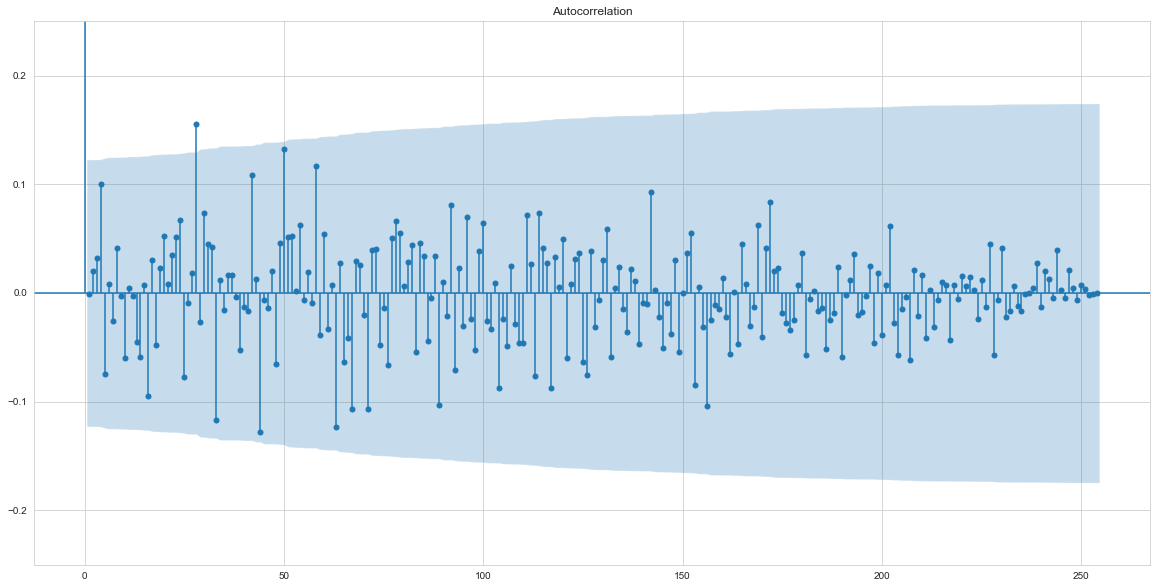

In [68]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(20, 10))

plot_acf(
    train['Qty'].dropna(),  
    lags = train.shape[0]-1,
    ax=ax
)
ax.set_ylim(-0.25, 0.25)

plt.show()

q = 28

## Modelling

In [120]:
import statsmodels.api as sm

model_28_0_28 = sm.tsa.arima.ARIMA(
    df_grouped['Qty'].dropna(), 
    order = (28, 0, 28)
)
result_optimal_28_0_28 = model_28_0_28.fit()

In [116]:
model_28_0_50 = sm.tsa.arima.ARIMA(
    df_grouped['Qty'].dropna(), 
    order = (28, 0, 50)
)
result_optimal_28_0_50 = model_28_0_50.fit()

In [118]:
model28_0_42 = sm.tsa.arima.ARIMA(
    df_grouped['Qty'].dropna(), 
    order = (28, 0, 42)
)
result_optimal28_0_42 = model28_0_42.fit()

In [147]:
prediksi28_0_28 = result_optimal_28_0_28.predict(start = 1, end = test.shape[0])
prediksi_28_0_50 = result_optimal_28_0_50.predict(start = 1, end = test.shape[0])
prediksi28_0_42 = result_optimal28_0_42.predict(start = 1, end = test.shape[0])

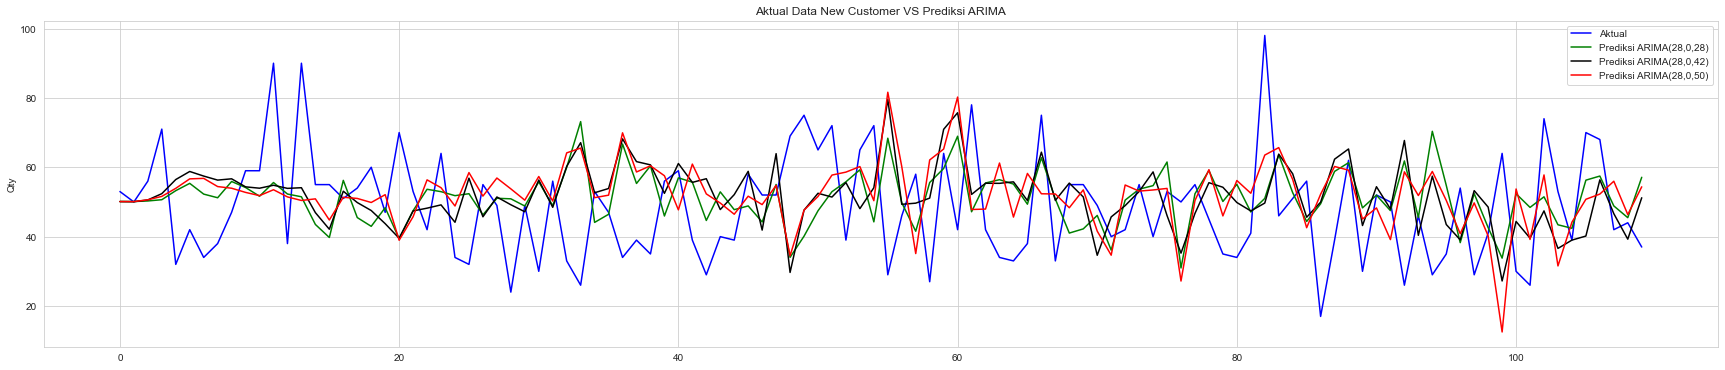

In [153]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Mengatur ukuran grafik
figs, axes = plt.subplots(
    1, 1,
    figsize = (30, 6),
    sharex = True
)

# Buat plot data aktual
sns.lineplot( 
    x = range(test.shape[0]),
    y = "Qty", 
    data = test,
    ax = axes,
    color = 'blue',
).set(title='Aktual Data New Customer VS Prediksi ARIMA')

# Plot data prediksi28_0_28
sns.lineplot( 
    x = range(prediksi28_0_28.shape[0]),
    y = prediksi28_0_28,
    ax = axes,
    color = 'green'
)

# Plot data prediksi28_0_42
sns.lineplot( 
    x = range(prediksi28_0_42.shape[0]),
    y = prediksi28_0_42,
    ax = axes,
    color = 'black'
)

# Plot data prediksi28_0_50
sns.lineplot( 
    x = range(prediksi_28_0_50.shape[0]),
    y = prediksi_28_0_50,
    ax = axes,
    color = 'red'
)

axes.legend(['Aktual', 'Prediksi ARIMA(28,0,28)', 'Prediksi ARIMA(28,0,42)', 'Prediksi ARIMA(28,0,50)'])
plt.show()

### Performansi Model

In [154]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE_28_0_28 = mean_absolute_error(y_true = test['Qty'], y_pred = prediksi28_0_28)
MSE_28_0_28 = mean_squared_error(y_true = test['Qty'], y_pred = prediksi28_0_28)

print('ARIMA(28,0,28)')
print(f'Mean Absolute Error = {MAE_28_0_28}')
print(f'Mean Squared Error = {MSE_28_0_28}\n')

MAE_28_0_42 = mean_absolute_error(y_true = test['Qty'], y_pred = prediksi28_0_42)
MSE_28_0_42 = mean_squared_error(y_true = test['Qty'], y_pred = prediksi28_0_42)

print('ARIMA(28,0,42)')
print(f'Mean Absolute Error = {MAE_28_0_42}')
print(f'Mean Squared Error = {MSE_28_0_42}\n')

MAE_28_0_50 = mean_absolute_error(y_true = test['Qty'], y_pred = prediksi_28_0_50)
MSE_28_0_50 = mean_squared_error(y_true = test['Qty'], y_pred = prediksi_28_0_50)

print('ARIMA(28,0,50)')
print(f'Mean Absolute Error = {MAE_28_0_50}')
print(f'Mean Squared Error = {MSE_28_0_50}')

MAE_28_1_28 = mean_absolute_error(y_true = test['Qty'], y_pred = prediksi28_1_28)
MSE_28_1_28 = mean_squared_error(y_true = test['Qty'], y_pred = prediksi28_1_28)

ARIMA(28,0,28)
Mean Absolute Error = 15.25724931629653
Mean Squared Error = 355.75884626735535

ARIMA(28,0,42)
Mean Absolute Error = 15.236022995557105
Mean Squared Error = 361.13715030874596

ARIMA(28,0,50)
Mean Absolute Error = 15.691691978695857
Mean Squared Error = 382.155148017813


## Conclusion

Ordo yang dipakai yaitu 
1. p = 28
2. d = 0
3. q = 28